In [ ]:
import matplotlib as plt
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
data = pd.read_csv('/movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
print(data.shape)

(5043, 28)


In [ ]:
data.info

<bound method DataFrame.info of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1

In [ ]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
# Create a new data frame with relevant columns only
df = data[['genres', 'movie_title', 'imdb_score', 'movie_imdb_link','duration']].copy()
df.head()

,genres,movie_title,imdb_score,movie_imdb_link,duration
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,7.9,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,178.0
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,7.1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,169.0
2,Action|Adventure|Thriller,Spectre,6.8,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,148.0
3,Action|Thriller,The Dark Knight Rises,8.5,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,164.0
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,7.1,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN


In [ ]:
genres=[]
for genre in data.genres:
  x=genre.split('|')
  for i in x:
    if i not in genres:
      genres.append(str(i))
genres=str(genres)
data_title=[]
for title in data_title:
  data_title.append(title[0:-7])
data_title=str(data_title)

In [ ]:
# Fetch genres of all movies
genres_all_movies = [df.loc[i]['genres'].split('|') for i in df.index]
# Find the list of genres of all movies in alphabetical order
genres = sorted(list(set([item for sublist in genres_all_movies for item in sublist])))
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [ ]:
len(genres)

26

In [ ]:
# Initialize lists for movie data as well as titles
full_data = []
movie_titles = []

In [ ]:
print(df)

                               genres  \
0     Action|Adventure|Fantasy|Sci-Fi   
1            Action|Adventure|Fantasy   
2           Action|Adventure|Thriller   
3                     Action|Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy|Drama   
5039     Crime|Drama|Mystery|Thriller   
5040            Drama|Horror|Thriller   
5041             Comedy|Drama|Romance   
5042                      Documentary   

                                            movie_title  imdb_score  \
0                                               Avatar          7.9   
1             Pirates of the Caribbean: At World's End          7.1   
2                                              Spectre          6.8   
3                                The Dark Knight Rises          8.5   
4     Star Wars: Episode VII - The Force Awakens    ...         7.1   
...                                                 ...         ...   
5038      

In [ ]:
df.to_csv('test.csv')

In [ ]:
# Initialize lists for movie data as well as titles
full_data = []
movie_titles = []
for i in df.index:
    # Append movie title and the index of the movie
    movie_titles.append((df.loc[i]['movie_title'].strip(), i, df.loc[i]['movie_imdb_link'].strip()))
    # Add list of genres of the movies (1/0) to movie data
    movie_data = [1 if genre in df.loc[i]['genres'].split('|') else 0 for genre in genres]
    # Add IMDb score of the movie to the movie data
    movie_data.append(df.loc[i]['imdb_score'])
    # Add record of movie to main data list
    full_data.append(movie_data)

In [ ]:
print(movie_titles)

[('Avatar', 0, 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1'), ("Pirates of the Caribbean: At World's End", 1, 'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1'), ('Spectre', 2, 'http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1'), ('The Dark Knight Rises', 3, 'http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1'), ('Star Wars: Episode VII - The Force Awakens', 4, 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1'), ('John Carter', 5, 'http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1'), ('Spider-Man 3', 6, 'http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1'), ('Tangled', 7, 'http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1'), ('Avengers: Age of Ultron', 8, 'http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1'), ('Harry Potter and the Half-Blood Prince', 9, 'http://www.imdb.com/title/tt0417741/?ref_=fn_tt_tt_1'), ('Batman v Superman: Dawn of Justice', 10, 'http://www.imdb.com/title/tt2975590/?ref_=fn_tt_tt_1'), ('Superman Returns', 11, 'http://www.imdb.

In [ ]:
print(full_data[0])

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 7.9]


In [ ]:
import json


In [ ]:
print(movie_titles)
print(movie_data)
data_dump = 'movie_data'
titles_dump = 'movie_titles'
with open(data_dump, 'w+', encoding='utf-8') as f:
    json.dump(full_data, f)
with open(titles_dump, 'w+', encoding='utf-8') as f:
    json.dump(movie_titles, f)

[('Avatar', 0, 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1'), ("Pirates of the Caribbean: At World's End", 1, 'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1'), ('Spectre', 2, 'http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1'), ('The Dark Knight Rises', 3, 'http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1'), ('Star Wars: Episode VII - The Force Awakens', 4, 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1'), ('John Carter', 5, 'http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1'), ('Spider-Man 3', 6, 'http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1'), ('Tangled', 7, 'http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1'), ('Avengers: Age of Ultron', 8, 'http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1'), ('Harry Potter and the Half-Blood Prince', 9, 'http://www.imdb.com/title/tt0417741/?ref_=fn_tt_tt_1'), ('Batman v Superman: Dawn of Justice', 10, 'http://www.imdb.com/title/tt2975590/?ref_=fn_tt_tt_1'), ('Superman Returns', 11, 'http://www.imdb.

In [ ]:
genres=[]
for genre in df.genres:
  x=genre.split('|')
  for i in x:
    if i not in genres:
      genres.append(str(i))
genres=str(genres)
movies_title=[]
for movie_title in df.movie_title:
  movies_title.append(movie_title[0:-7])
movies_title=str(movies_title)

Data Visualization


In [ ]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2,min_word_length=3).generate(movies_title)

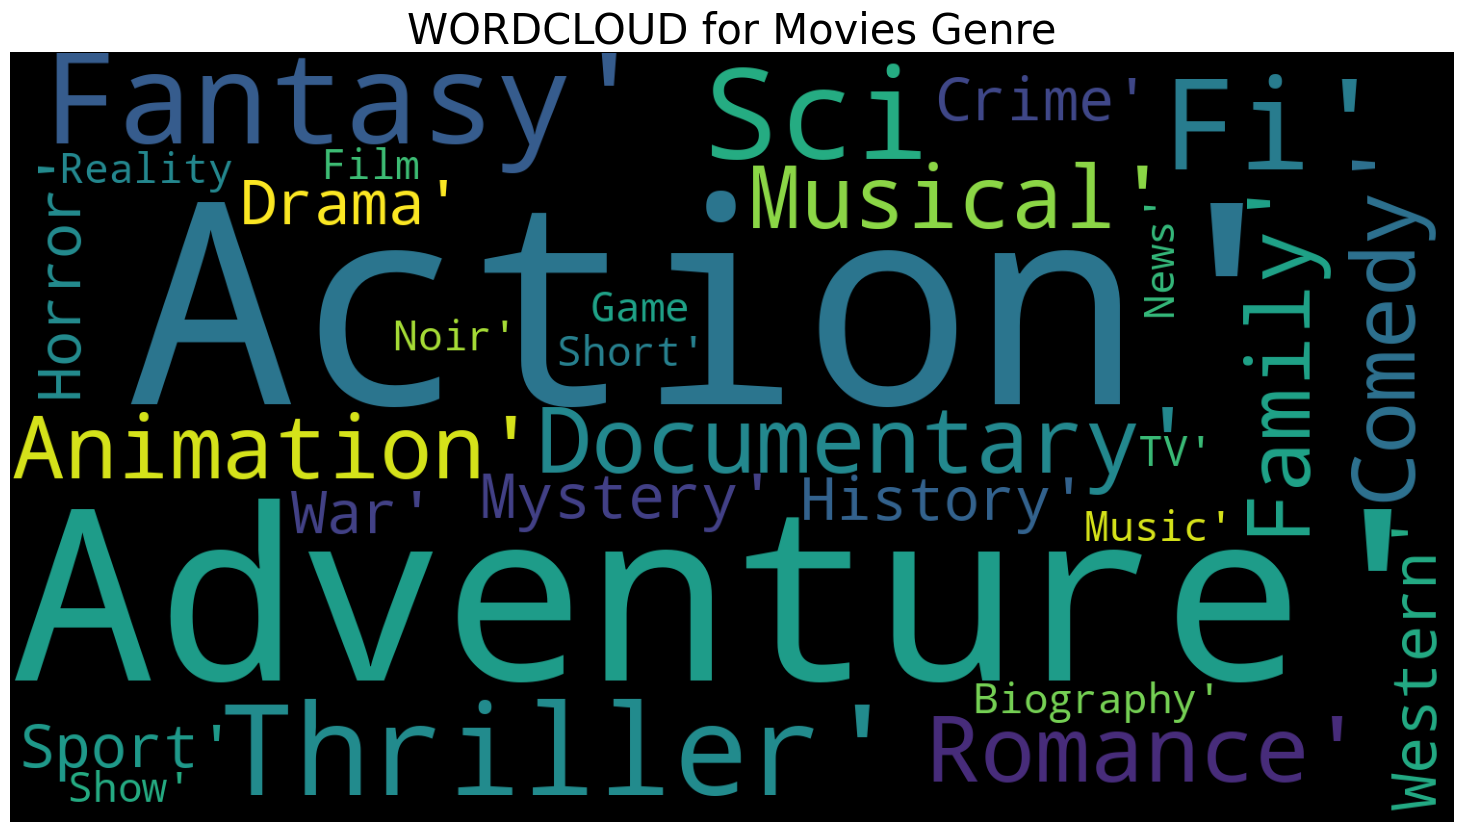

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

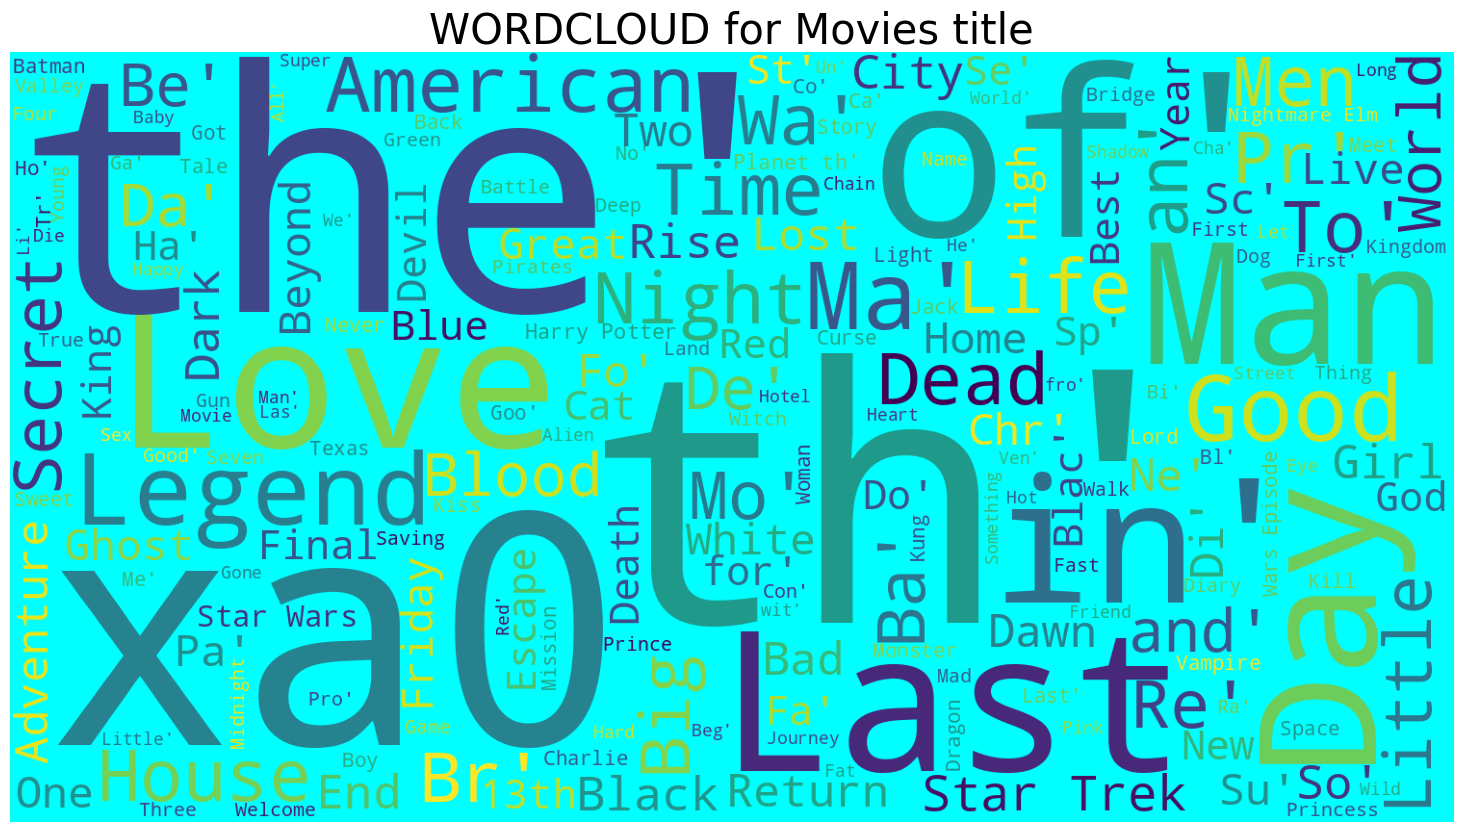

In [ ]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [ ]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df['genres'])

In [ ]:
cosine_sim=linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices=pd.Series(df.index,index=df['movie_title'])
titles=df['movie_title']
def recommendations(movie_title):
  idx=indices[movie_title]
  sim_scores=list(enumerate(cosine_sim[idx]))
  sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
  sim_scores=sim_scores[1:21]
  movie_indices=[i[0] for i in sim_scores]
  return titles.iloc[movie_indices]